In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../scripts")
from time_series_analysis import kpss_test, plot_trends_seasonal

In [2]:
DATA_FOLDER = '../data'
gas_timeseries = pd.read_csv(f'{DATA_FOLDER}/BrentOilPrices.csv')

In [3]:
gas_timeseries['Date'] = pd.to_datetime(gas_timeseries['Date'], format='mixed')
gas_timeseries.set_index('Date', inplace=True)
gas_timeseries['Price'] = gas_timeseries['Price'].interpolate(method='time')



In [4]:
events = pd.read_csv(f'{DATA_FOLDER}/events.csv')

In [5]:
gas_timeseries.describe()

,Price
count,9011.000000
mean,48.420782
std,32.860110
min,9.100000
25%,19.050000
50%,38.570000
75%,70.090000
max,143.950000


In [6]:
events['Approximate_Start_Date'] = pd.to_datetime(events['Approximate_Start_Date'])

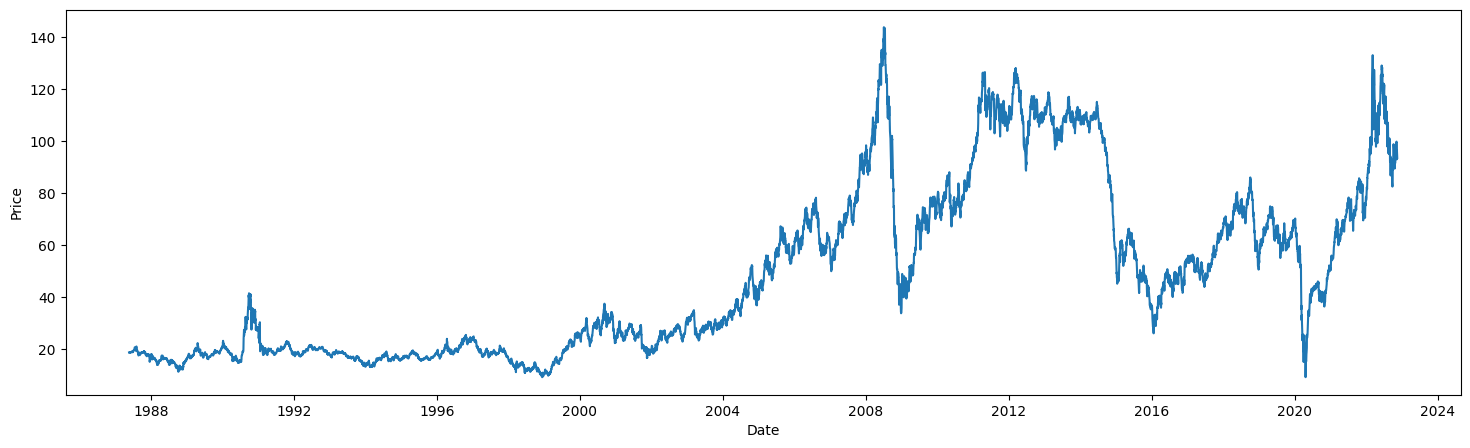

In [7]:

plt.figure(figsize=(18, 5))
sns.lineplot(gas_timeseries, x="Date", y="Price")
plt.show()

In [8]:
events.describe()

,Event_ID,Approximate_Start_Date
count,16.000000,16
mean,8.500000,2011-07-14 00:00:00
min,1.000000,1990-08-02 00:00:00
25%,4.750000,2002-11-01 06:00:00
50%,8.500000,2014-04-24 12:00:00
75%,12.250000,2020-03-19 00:00:00
max,16.000000,2023-10-07 00:00:00
std,4.760952,NaN


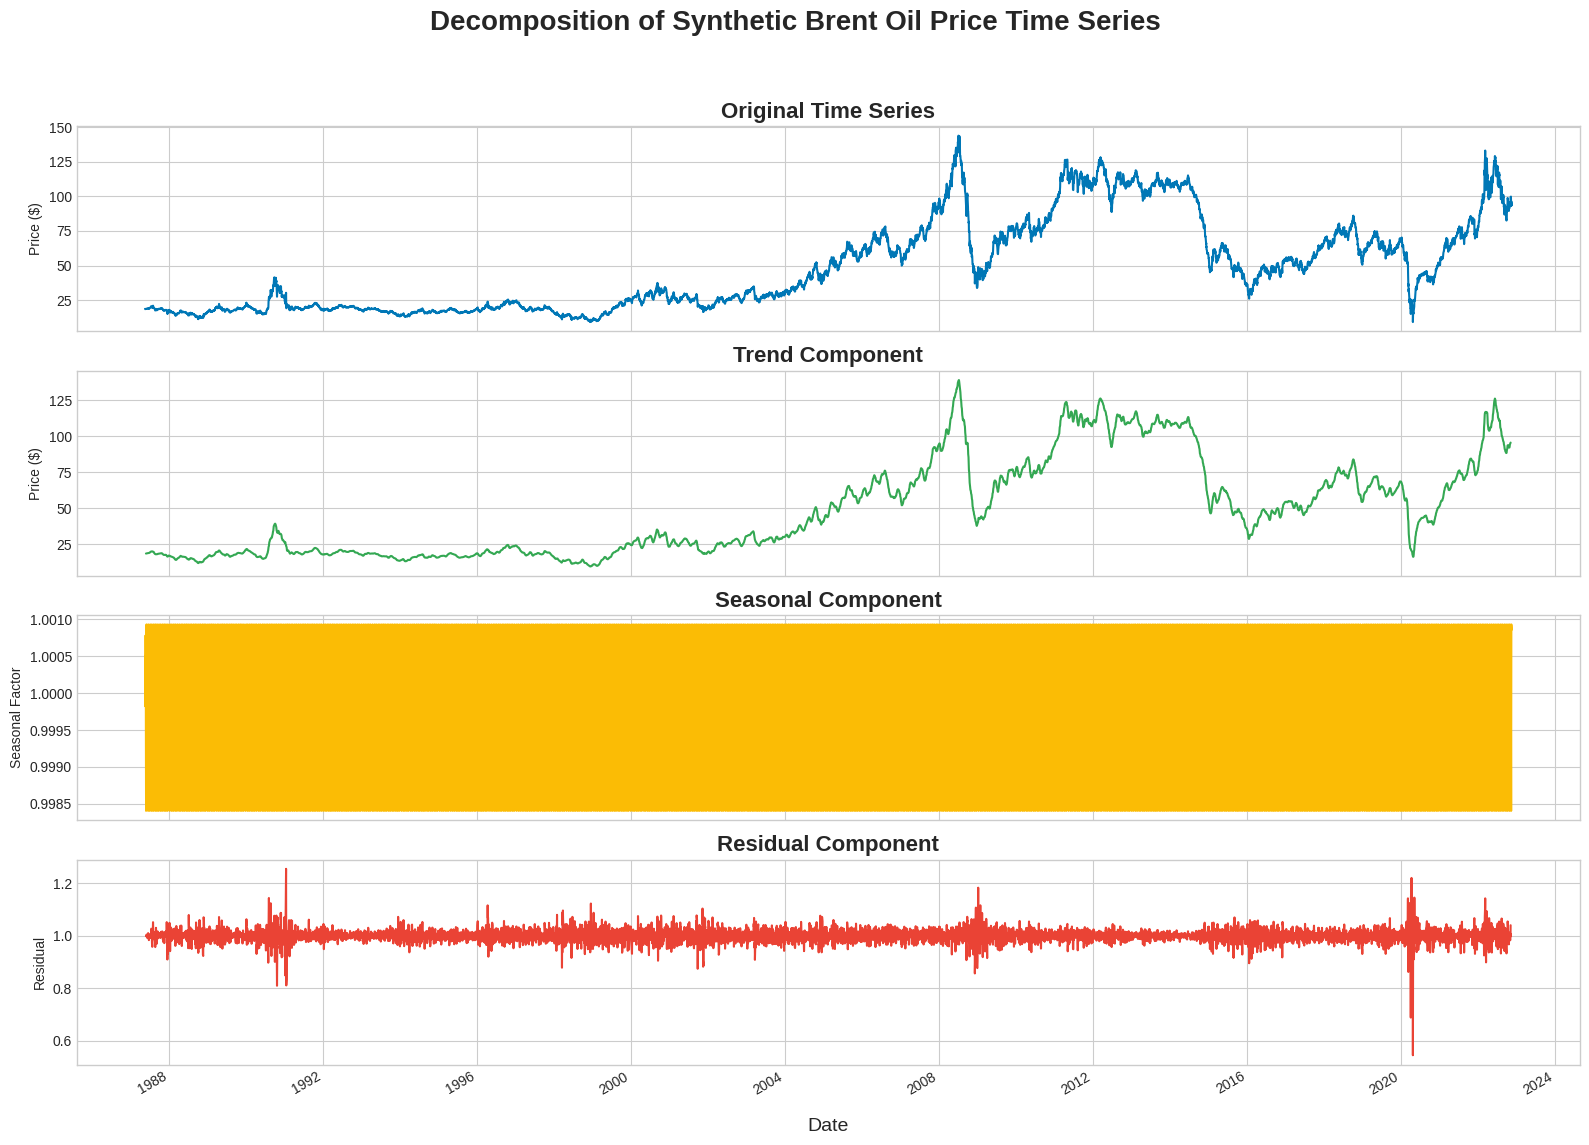

In [9]:
plot_trends_seasonal(gas_timeseries)

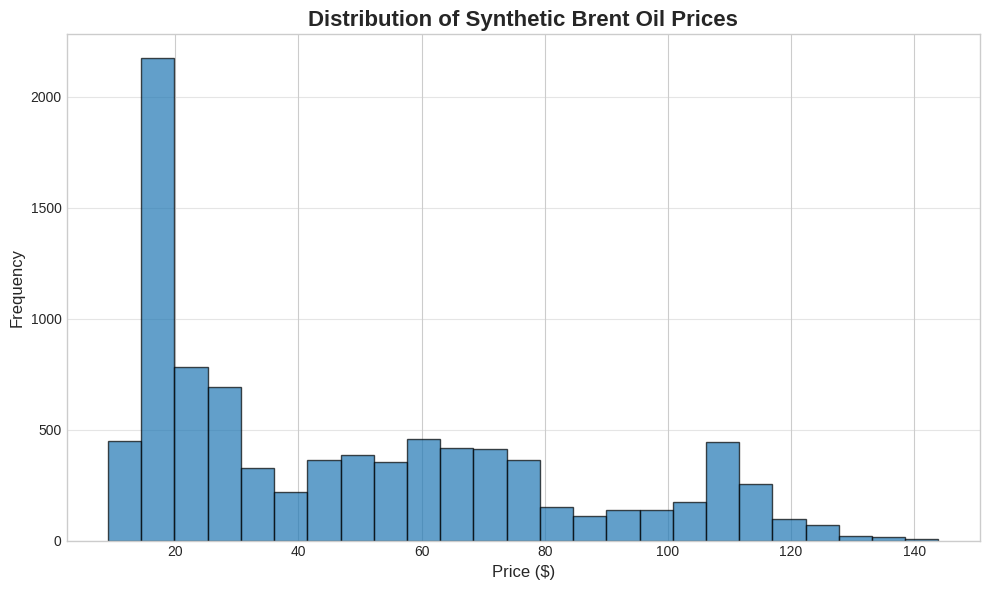

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(gas_timeseries, bins=25,  edgecolor='black', alpha=0.7)
plt.title('Distribution of Synthetic Brent Oil Prices', fontsize=16, fontweight='bold')
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()


In [11]:

gas_timeseries['Log_Return'] = np.log(gas_timeseries['Price']).diff().dropna()
price = gas_timeseries['Price'].values.reshape(-1,1)
kpss_test(price)

likely non-stationary


/home/mikiask/anotherproject/statistical-modelling-of-time-series-data-week-10/notebooks/../scripts/time_series_analysis.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_statistic, p_value, n_lags, critical_values = kpss(timeseries,regression='c')


True

In [12]:
log_return_price = gas_timeseries['Log_Return'].dropna()
 

(<Figure size 1000x200 with 1 Axes>, [<Axes: >])

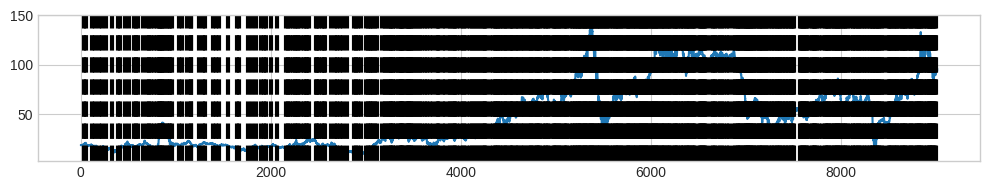

In [13]:
import ruptures as rpt

algo = rpt.Pelt(model="l2", min_size=10)
algo.fit(price)
result = algo.predict(pen=10)
rpt.display(price, [], result)

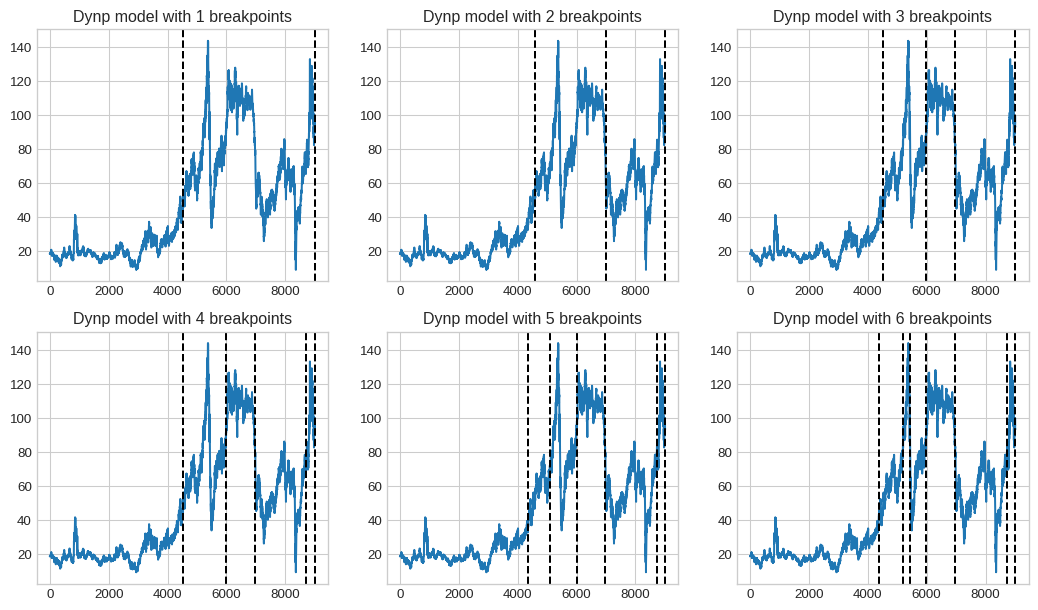

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,3, figsize=(1280/96, 720/96), dpi=96)
ax = ax.ravel()

algo = rpt.Dynp(model="l2", min_size=28)
algo.fit(price)

for i, n_bkps in enumerate([1, 2, 3, 4, 5, 6]):
    result = algo.predict(n_bkps=n_bkps)
    ax[i].plot(price)
    for bkp in result:
        ax[i].axvline(x=bkp, color='k', linestyle='--')
    ax[i].set_title(f"Dynp model with {n_bkps} breakpoints")

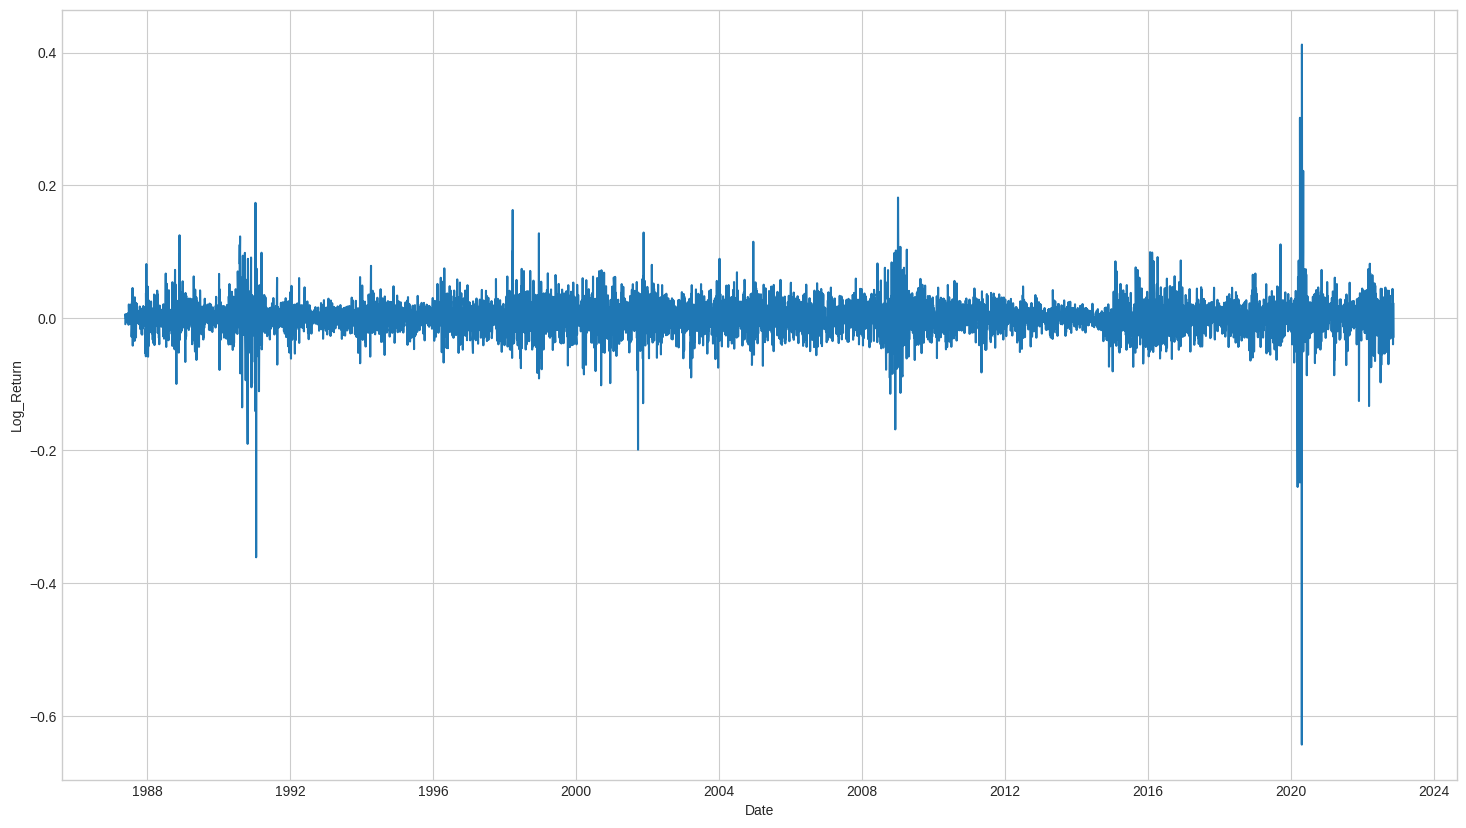

In [ ]:
plt.figure(figsize=(18,5))
sns.lineplot(gas_timeseries,x="Date", y="Log_Return")
plt.show()